<a href="https://colab.research.google.com/github/min02yam/wether/blob/main/%EB%82%A0%EC%94%A8%EB%A7%88%EB%A3%A8_%EA%B8%B0%ED%83%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. warn_code
할거: var로 빼내기 

In [22]:
system("gdown --id 1__KbQ0VP1HlFsWRIhzKftYHaB8nAB301") #warn_code
system("gdown --id 1M2rU3Xc2Z7TDmlNg7B61RVAtGRVz58_6") # 특보구역

# 0.라이브러리 로드

In [4]:
suppressPackageStartupMessages({
  require(tidyverse)
  require(magrittr)
  require(data.table)
})

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [34]:
#install.packages("DataExplorer")
#library(DataExplorer)
install.packages("sqldf")
library(sqldf)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plogr’, ‘gsubfn’, ‘proto’, ‘RSQLite’, ‘chron’


Loading required package: gsubfn

Loading required package: proto

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: RSQLite



In [51]:
#특보=fread("WARN_CODE.csv")
특보구역= fread("특보구역.csv")

# 변수명 변경

In [25]:
names(특보) = str_sub(names(특보), nchar("warn_code.")+1)

In [26]:
특보구역 %>% head

특보구역,종료시각,시작시각,특보구역명(한글),구역특성,특보구역명(정식),행정동코드
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
L1000000,2100.12.31.00:00,2005.07.01.00:00,전국,1,전국,NA
L1010000,2100.12.31.00:00,2005.07.01.00:00,경기도,2,경기도,NA
L1010100,2100.12.31.00:00,2005.07.01.00:00,서울,13,서울특별시,1.100e+09
L1010200,2100.12.31.00:00,2005.07.01.00:00,광명,13,광명시,4.121e+09
L1010300,2100.12.31.00:00,2005.07.01.00:00,과천,13,과천시,4.129e+09
L1010400,2100.12.31.00:00,2005.07.01.00:00,안산,113,안산시,4.127e+09


In [52]:
gsub("\\(.*?\\)","", names(특보구역))
names(특보구역)=gsub("\\(","_", names(특보구역))
names(특보구역)=gsub("\\)","", names(특보구역))

In [58]:
특보구역 %>% nrow()

[1] 324

In [57]:
특보구역 %>% select(특보구역명_한글,특보구역명_정식) %>% distinct %>% nrow() # 다른게 있음

[1] 312

In [61]:
특보구역 %>% select(특보구역명_한글,특보구역명_정식)  %>%
  filter( 특보구역명_한글 !=특보구역명_정식)

특보구역명_한글,특보구역명_정식
<chr>,<chr>
서울,서울특별시
광명,광명시
과천,과천시
안산,안산시
시흥,시흥시
부천,부천시
김포,김포시
인천,인천광역시
강화,강화군


In [73]:
특보구역 %>% select(특보구역, 특보구역명_정식, 구역특성) -> 특보구역2

In [65]:
특보 %>% arrange(start_time) %>% head

stn_id,tm_fc,tm_seq,area_code,warn_var,warn_stress,command,start_time,end_time,all_end_time,cancel
<int>,<dttm>,<int>,<chr>,<int>,<int>,<int>,<dttm>,<dttm>,<dttm>,<int>
108,2012-01-01 11:00:00,1,L1052500,1,0,1,2012-01-01 12:00:00,NA,NA,0
108,2012-01-01 13:30:00,2,S1231100,6,0,1,2012-01-01 13:30:00,NA,NA,0
108,2012-01-01 13:30:00,2,S1231200,6,0,1,2012-01-01 13:30:00,NA,NA,0
108,2012-01-01 11:00:00,1,S1152000,6,0,1,2012-01-01 15:00:00,NA,NA,0
108,2012-01-01 11:00:00,1,S1252000,6,0,1,2012-01-01 15:00:00,NA,NA,0
108,2012-01-01 13:30:00,2,S1251300,6,0,1,2012-01-01 15:00:00,NA,NA,0


# 데이터테이블 병합

In [76]:
sqldf("select *
  from 특보
  left join 특보구역2
  on 특보.area_code=특보구역2.특보구역
")  -> DT

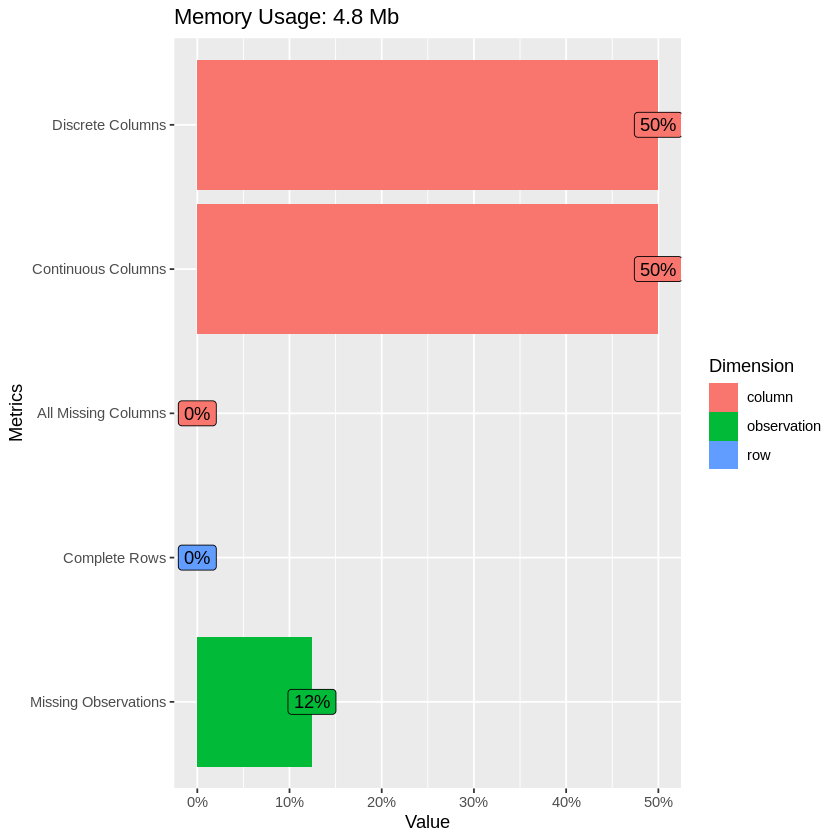

In [77]:
plot_intro(DT)

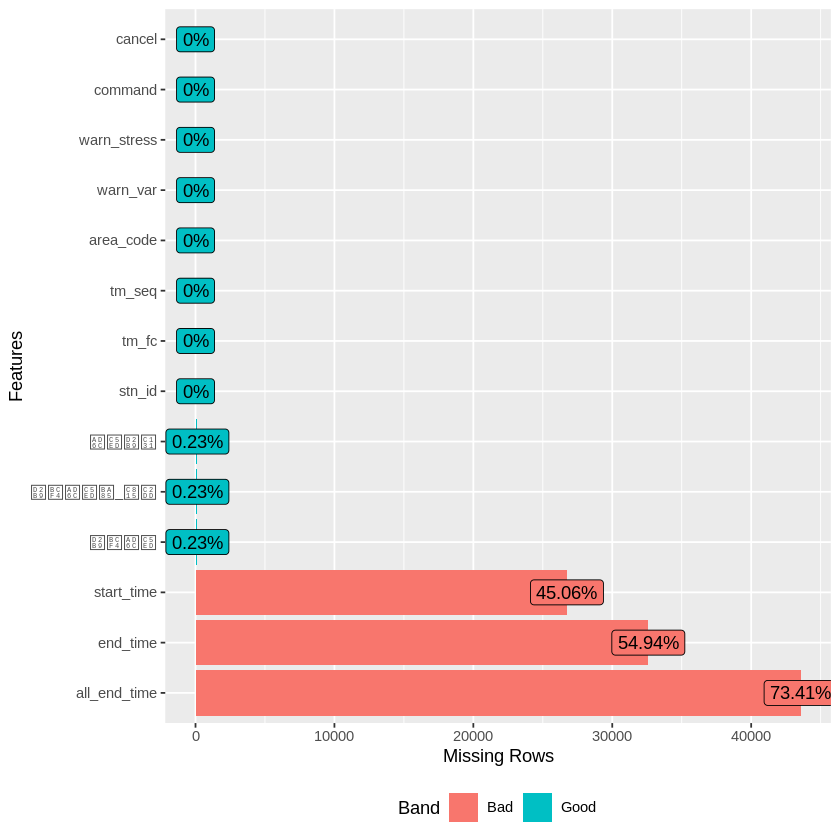

In [78]:
plot_missing(DT)

In [94]:
DT %>% select(tm_fc, tm_seq, area_code,warn_var,warn_stress	,command, cancel, 특보구역명_정식,구역특성) ->DT2

In [97]:
DT2 %>% filter( warn_var==12, 특보구역명_정식== '인천광역시')

tm_fc,tm_seq,area_code,warn_var,warn_stress,command,cancel,특보구역명_정식,구역특성
<dttm>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>
2012-06-25 04:00:00,19,L1010800,12,0,1,0,인천광역시,113
2012-06-25 16:00:00,22,L1010800,12,0,2,0,인천광역시,113
2012-08-01 04:00:00,1,L1010800,12,0,1,0,인천광역시,113
2012-08-08 16:00:00,24,L1010800,12,0,2,0,인천광역시,113
2014-08-01 10:00:00,6,L1010800,12,0,1,0,인천광역시,113
2014-08-02 21:00:00,30,L1010800,12,0,2,0,인천광역시,113
2016-08-03 17:00:00,17,L1010800,12,0,1,0,인천광역시,113
2016-08-21 13:00:00,70,L1010800,12,1,5,0,인천광역시,113
2016-08-24 16:00:00,74,L1010800,12,0,5,0,인천광역시,113


In [102]:
DT2 %>% select(특보구역명_정식, 구역특성) %>%
  filter(구역특성==13) %>% head

,특보구역명_정식,구역특성
,<chr>,<int>
1,철원군,13
2,화천군,13
3,양구군,13
4,김해시,13
5,동두천시,13
6,연천군,13


In [106]:
DT2 %>% filter(is.na(특보구역명_정식))

tm_fc,tm_seq,area_code,warn_var,warn_stress,command,cancel,특보구역명_정식,구역특성
<dttm>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>
2016-01-18 03:00:00,67,L1052600,1,0,1,0,NA,NA
2016-01-18 07:00:00,70,L1091000,1,0,1,0,NA,NA
2016-01-19 21:00:00,92,L1052600,1,0,2,0,NA,NA
2016-01-19 21:00:00,92,L1091000,1,0,2,0,NA,NA
2016-01-23 04:00:00,113,L1091000,1,0,1,0,NA,NA
2016-01-23 09:30:00,117,L1052600,1,0,1,0,NA,NA
2016-01-23 09:30:00,117,L1091000,8,0,1,0,NA,NA
2016-01-23 11:00:00,118,L1091000,3,0,1,0,NA,NA
2016-01-24 04:00:00,132,L1091000,1,1,5,0,NA,NA


In [101]:
#DT2['구역특성'] %>% table

구역특성
   13    14    15   113 10013 10113 
23108  3873  7526 15145  9183   364 

In [90]:
#DT['cancel']%>% distinct
#DT2['cancel'] %>% distinct

cancel
<int>
0
